# Twitter airline sentiment analysis
Twitter has established itself as a convenient platform for both companies and customers to communicate with eachother directly. With over 500 million monthly active users, the platform has a plethora of information to be mined. This is where we can use sentiment analysis to detect negative social media comments/complaints that can impact the business.
Hence monitoring tweets and conversations on twitter has become a part of the social media strategy for several companies.

Objectives:

Exploratory data analysis.

To understand the sentiments of the customers of each airline.

To understand the problems that customers face in each airline.

To understand the financials implications of the problems.

How companies can learn from eachother?


Dataset summary:
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").
source:https://data.world/crowdflower/airline-twitter-sentiment

The dataset has the following columns:
tweet_id

airline_sentiment

airline_sentiment_confidence

negativereason

negativereason_confidence

airline

airline_sentiment_gold

name

negativereason_gold

retweet_count

text

tweet_coord

tweet_created

tweet_location

user_timezone

Importing libraries

In [257]:
import pandas as pd
import re
import numpy as np
import pandas as  pd
from pprint import pprint# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel# spaCy for preprocessing
import spacy# Plotting tools
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
#%matplotlib inline
from wordcloud import WordCloud
import seaborn as sns
import math

In [4]:
df_in = pd.read_csv('Tweets.csv')

In [5]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
df_in.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [7]:
print("Percentage null values")
((df_in.isnull() | df_in.isna()).sum() * 100 / df_in.index.size).round(2)

Percentage null values


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

In [8]:
#getting a timeline of the time when the tweets were created
print(df_in['tweet_created'].max())
print(df_in['tweet_created'].min())

2015-02-24 11:53:37 -0800
2015-02-16 23:36:05 -0800


The timeline of the dataset is between the 16th and 24th of February,2015

We can see that there is a lot of missing data in the dataset. However, there are a lot of usable columns that contaon 100% of the data. With these columns we would still be able to do a meaning full analysis and derive insights.
Picking only the columns that contain 0% null values. 

In [11]:
columns = ['tweet_id','airline_sentiment','airline_sentiment_confidence','airline','name','retweet_count','text']

In [12]:
df = df_in[columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   airline                       14640 non-null  object 
 4   name                          14640 non-null  object 
 5   retweet_count                 14640 non-null  int64  
 6   text                          14640 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 800.8+ KB


In [13]:
##EDA

In [14]:
airlines = df['airline'].unique().tolist()
print(airlines)

neg_reasons = df_in['negativereason'].unique().tolist()
neg_reasons.pop(0)
print(neg_reasons)

['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways', 'American']
['Bad Flight', "Can't Tell", 'Late Flight', 'Customer Service Issue', 'Flight Booking Problems', 'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight', 'Damaged Luggage', 'longlines']


The airlines in the dataset are Virgin America, United, Southwest, Delta, US Airways and American.
Some of the most common problems hounding the airlines are Bad flights, Late flights, long lines, damaged/lost luggages, flight attendant issues, flight cancellations and other customer service issues.

In [16]:
print(df['airline_sentiment'].unique())

['neutral' 'positive' 'negative']


The sentiments in the dataset are neutral,positive and negative.

In [17]:
print(df['text'])

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object


In [18]:
# Group by 'Category' and count the occurrences in each group
count_data = df['airline_sentiment'].value_counts().reset_index()
# Rename the columns for clarity
count_data.columns = ['Sentiment', 'Count']

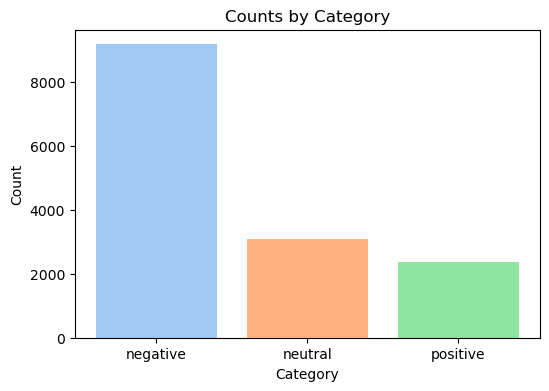

In [19]:
# Set a color palette
colors = sns.color_palette('pastel')
# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(count_data['Sentiment'], count_data['Count'],color=colors)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Counts by Category')
plt.show()

Most number of the tweets are negative in nature, which could be attributed to customers using twitter to bring forward their grievances.

In [20]:
## tweet count by airline
tweet_counts = df['airline'].value_counts().reset_index()
tweet_counts.columns = ['Airline', 'Tweet_Count']
print(tweet_counts)

          Airline  Tweet_Count
0          United         3822
1      US Airways         2913
2        American         2759
3       Southwest         2420
4           Delta         2222
5  Virgin America          504


United airlines has the most number of tweets directed at them during the timeline of the dataset. Virgin america has the least number of tweets. United airlines is the 3rd largest airline in terms of scheduled passenger-kilometers flown (millions) according to FAA data and it can directly contribute to the large volume of tweets aimed at them

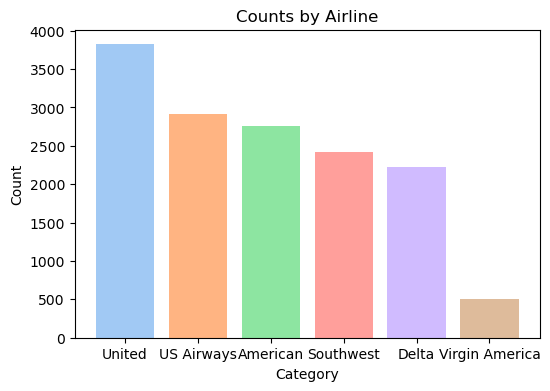

In [21]:
# Set a color palette
colors = sns.color_palette('pastel')
# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(tweet_counts['Airline'], tweet_counts['Tweet_Count'],color=colors)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Counts by Airline')
plt.show()

<IPython.core.display.Javascript object>


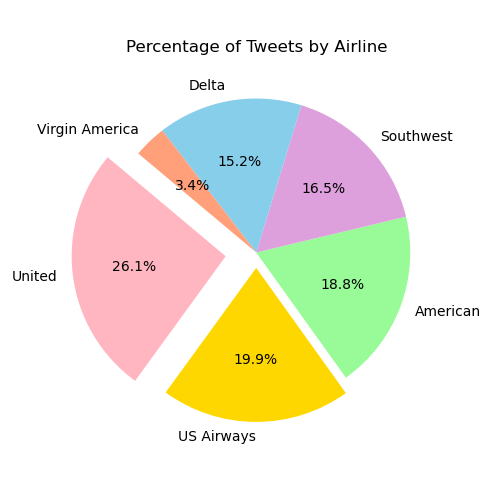

In [59]:
# Calculate the percentage of tweets for each airline
tweet_counts['Percentage'] = (tweet_counts['Tweet_Count'] / tweet_counts['Tweet_Count'].sum()) * 100

# Plotting a pie chart
plt.figure(figsize=(5, 5))
pastel_colors = ['#FFB6C1', '#FFD700', '#98FB98', '#DDA0DD', '#87CEEB', '#FFA07A']
explode = [0.2,0.1,0,0,0,0]
plt.pie(tweet_counts['Percentage'], labels=tweet_counts['Airline'], autopct='%1.1f%%', startangle=140,colors=pastel_colors, explode=explode)
plt.title('Percentage of Tweets by Airline')
plt.show()

In [22]:
##drill-down by airline
sentiment_counts = df.groupby(['airline', 'airline_sentiment']).size().unstack(fill_value=0)
# Reset the index
sentiment_counts.reset_index(inplace=True)
print(sentiment_counts)

airline_sentiment         airline  negative  neutral  positive
0                        American      1960      463       336
1                           Delta       955      723       544
2                       Southwest      1186      664       570
3                      US Airways      2263      381       269
4                          United      2633      697       492
5                  Virgin America       181      171       152


<IPython.core.display.Javascript object>


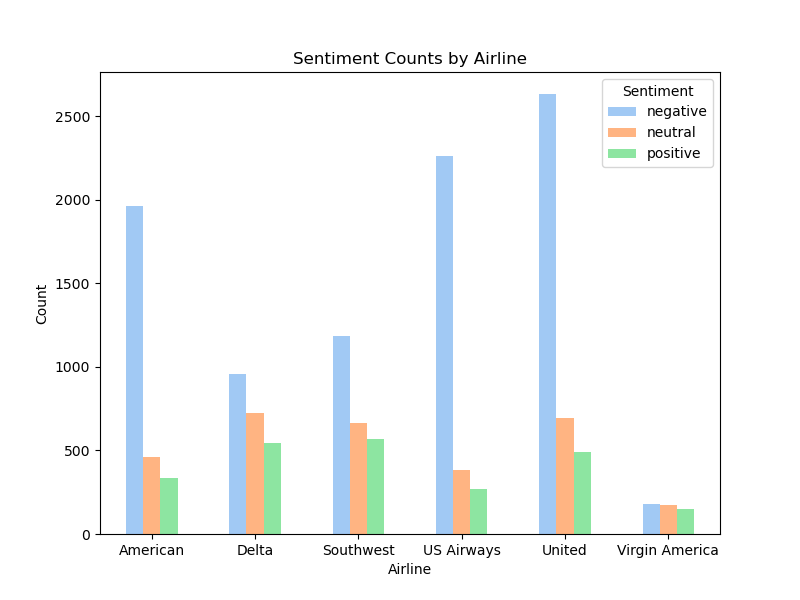

In [48]:
# Create a bar plot
%matplotlib notebook
ax = sentiment_counts.plot(x='airline', kind='bar',figsize=(8,6), stacked=False,color=colors)
plt.xticks(rotation=0)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Sentiment Counts by Airline')
plt.legend(title='Sentiment')
plt.show()

This is not a fair comparison given the unbalanced nature of the tweet counts by airline. Hence we need to normalize the sentiment counts by airline.

# Understanding the sentiments of the customers by airline.

In [85]:
##Normalizing the tweet counts 

In [71]:
sentiments = ['negative','neutral','positive']
sentiment_counts['RowSum'] = sentiment_counts[sentiments].sum(axis=1)
print(sentiment_counts)

airline_sentiment         airline  negative  neutral  positive  RowSum
0                        American      1960      463       336    2759
1                           Delta       955      723       544    2222
2                       Southwest      1186      664       570    2420
3                      US Airways      2263      381       269    2913
4                          United      2633      697       492    3822
5                  Virgin America       181      171       152     504


In [88]:
sentiment_counts['negative%'] = round((sentiment_counts['negative'] / sentiment_counts['RowSum'])*100,2)
sentiment_counts['positive%'] = round((sentiment_counts['positive'] / sentiment_counts['RowSum'])*100,2)
sentiment_counts['neutral%'] = round((sentiment_counts['neutral'] / sentiment_counts['RowSum'])*100,2)

In [89]:
columns = ['airline','negative%','positive%','neutral%']
normalized_percentages = sentiment_counts[columns]
normalized_percentages.head(10)

airline_sentiment,airline,negative%,positive%,neutral%
0,American,71.04,12.18,16.78
1,Delta,42.98,24.48,32.54
2,Southwest,49.01,23.55,27.44
3,US Airways,77.69,9.23,13.08
4,United,68.89,12.87,18.24
5,Virgin America,35.91,30.16,33.93


<IPython.core.display.Javascript object>


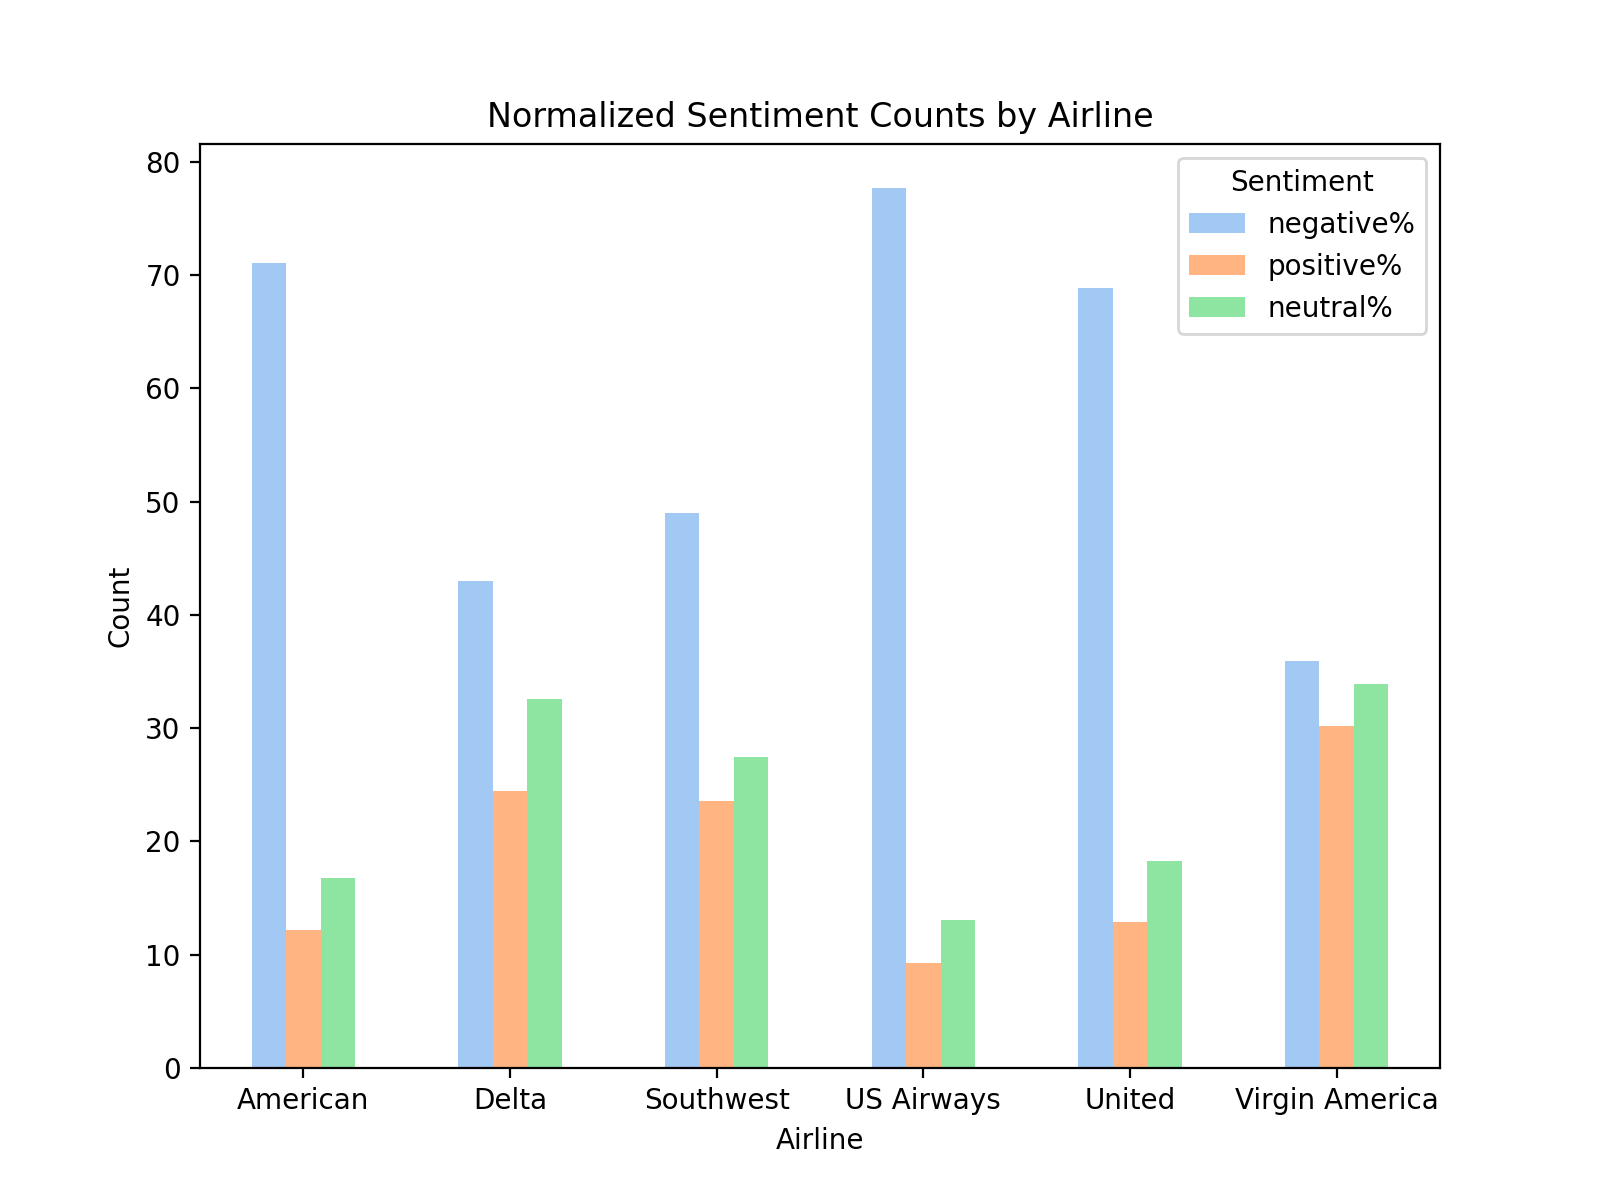

In [90]:
# Create a bar plot
%matplotlib notebook
ax = normalized_percentages.plot(x='airline', kind='bar',figsize=(8,6), stacked=False,color=colors)
plt.xticks(rotation=0)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Normalized Sentiment Counts by Airline')
plt.legend(title='Sentiment')
plt.show()

US airways has the highest percentage of negative tweets aimed at them, followed by American and United airlines.


Virgin america has the most balanced sentiment counts when compared to the other airlines in the dataset. It also boasts of the highest number of positive & neutral tweets aimed at them.  




American: The high negative sentiments and relatively low positive sentiments for American warrants a deeper analysis into their problems and where they could potentially concentrate to get better customer feedback.

Delta: Delta has a higher percentage of negative tweets aimed at them but the positive and neutral percentages are also higher than that of the other airlines in the dataset just behind virgin america.

SouthWest: SouthWest's sentiment profile is very similar to Delta in terms of percentages.

A drill-down of the problems hounding each airline would give more insights on to the sentiments of the customer

# Understanding the problems that customers face in each airline

In [142]:
##Get the number of negative reasons
neg_reasons = df_in['negativereason']
uniq_neg_reasons = list(set(neg_reasons))
print(uniq_neg_reasons)

['Late Flight', 'Flight Booking Problems', 'longlines', "Can't Tell", nan, 'Lost Luggage', 'Flight Attendant Complaints', 'Bad Flight', 'Damaged Luggage', 'Customer Service Issue', 'Cancelled Flight']


Some of the common problems hounding the airlines are Late flight,customer issues, booking problems and so on. 

<IPython.core.display.Javascript object>


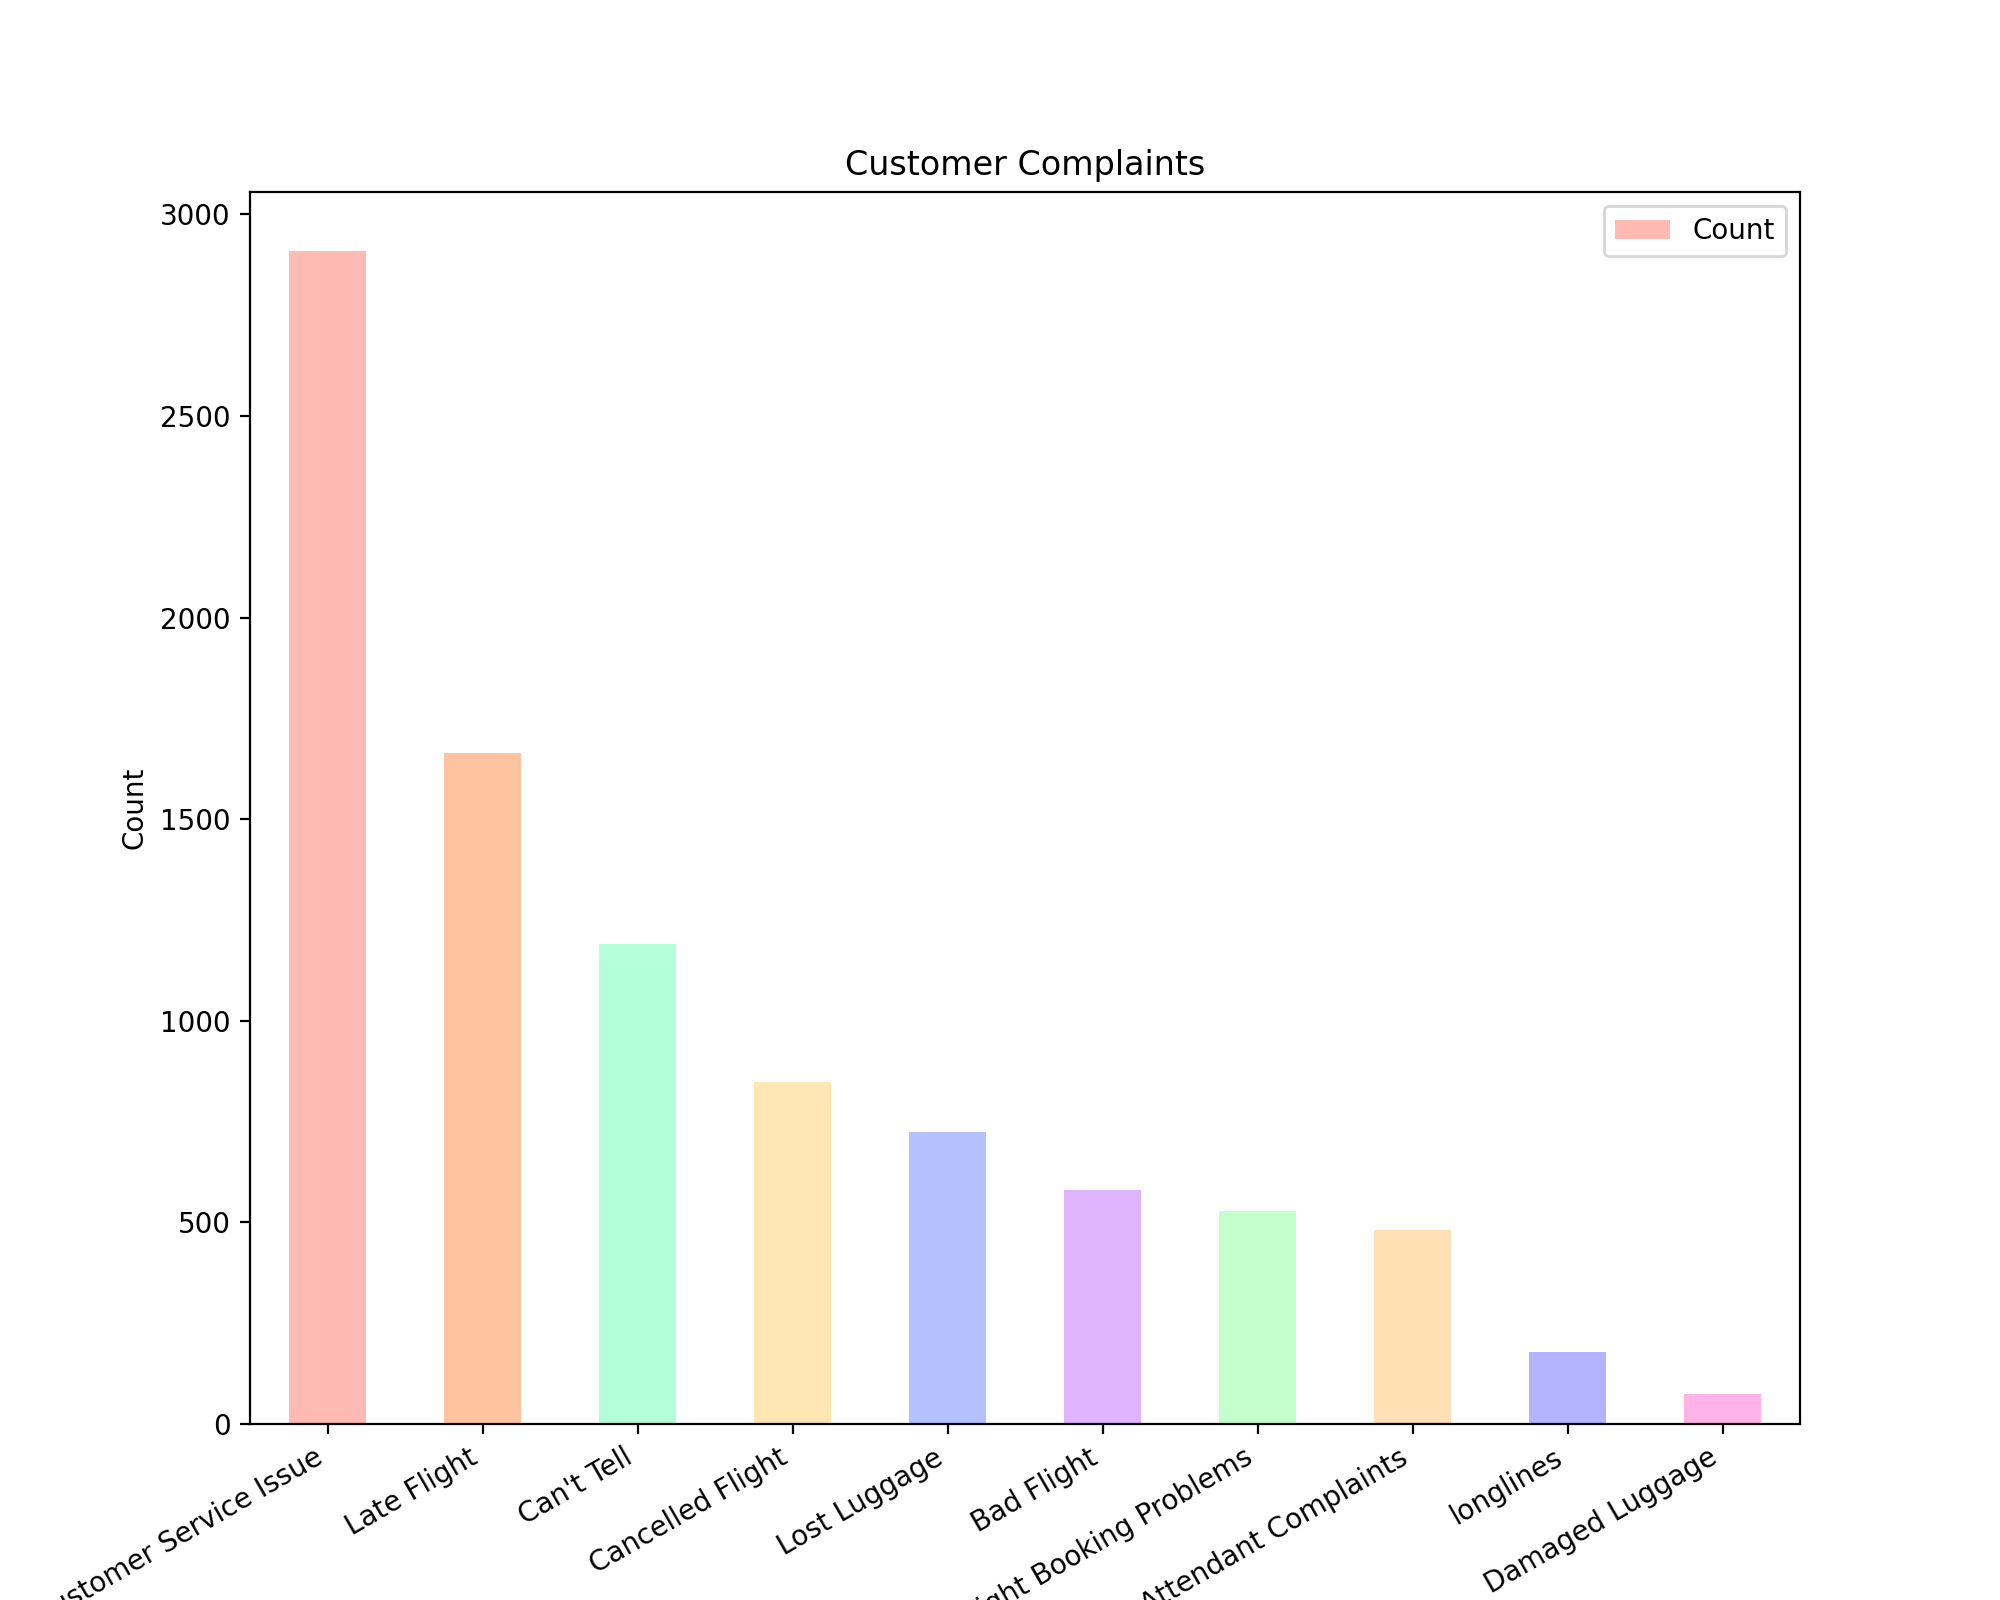

In [258]:
count=dict(df_in['negativereason'].value_counts())
# Convert the dictionary to a DataFrame
issue_counts = pd.DataFrame(list(count.items()), columns=['Issue', 'Count'])

#plot the dataframe
colors=['#ffbbb3', '#ffc3a0', '#b3ffd9', '#ffe6b3', '#b3c2ff', '#e0b3ff', '#c2ffcc', '#ffdfb3', '#b3b3ff', '#ffb3e6']
ax = issue_counts.plot(x='Issue', y='Count', kind='bar',figsize=(10,8), stacked=False,color=colors)
plt.title('Customer Complaints')
plt.xlabel('Issue')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Count')
plt.show()

In [206]:
##airline-wise drill down

<IPython.core.display.Javascript object>


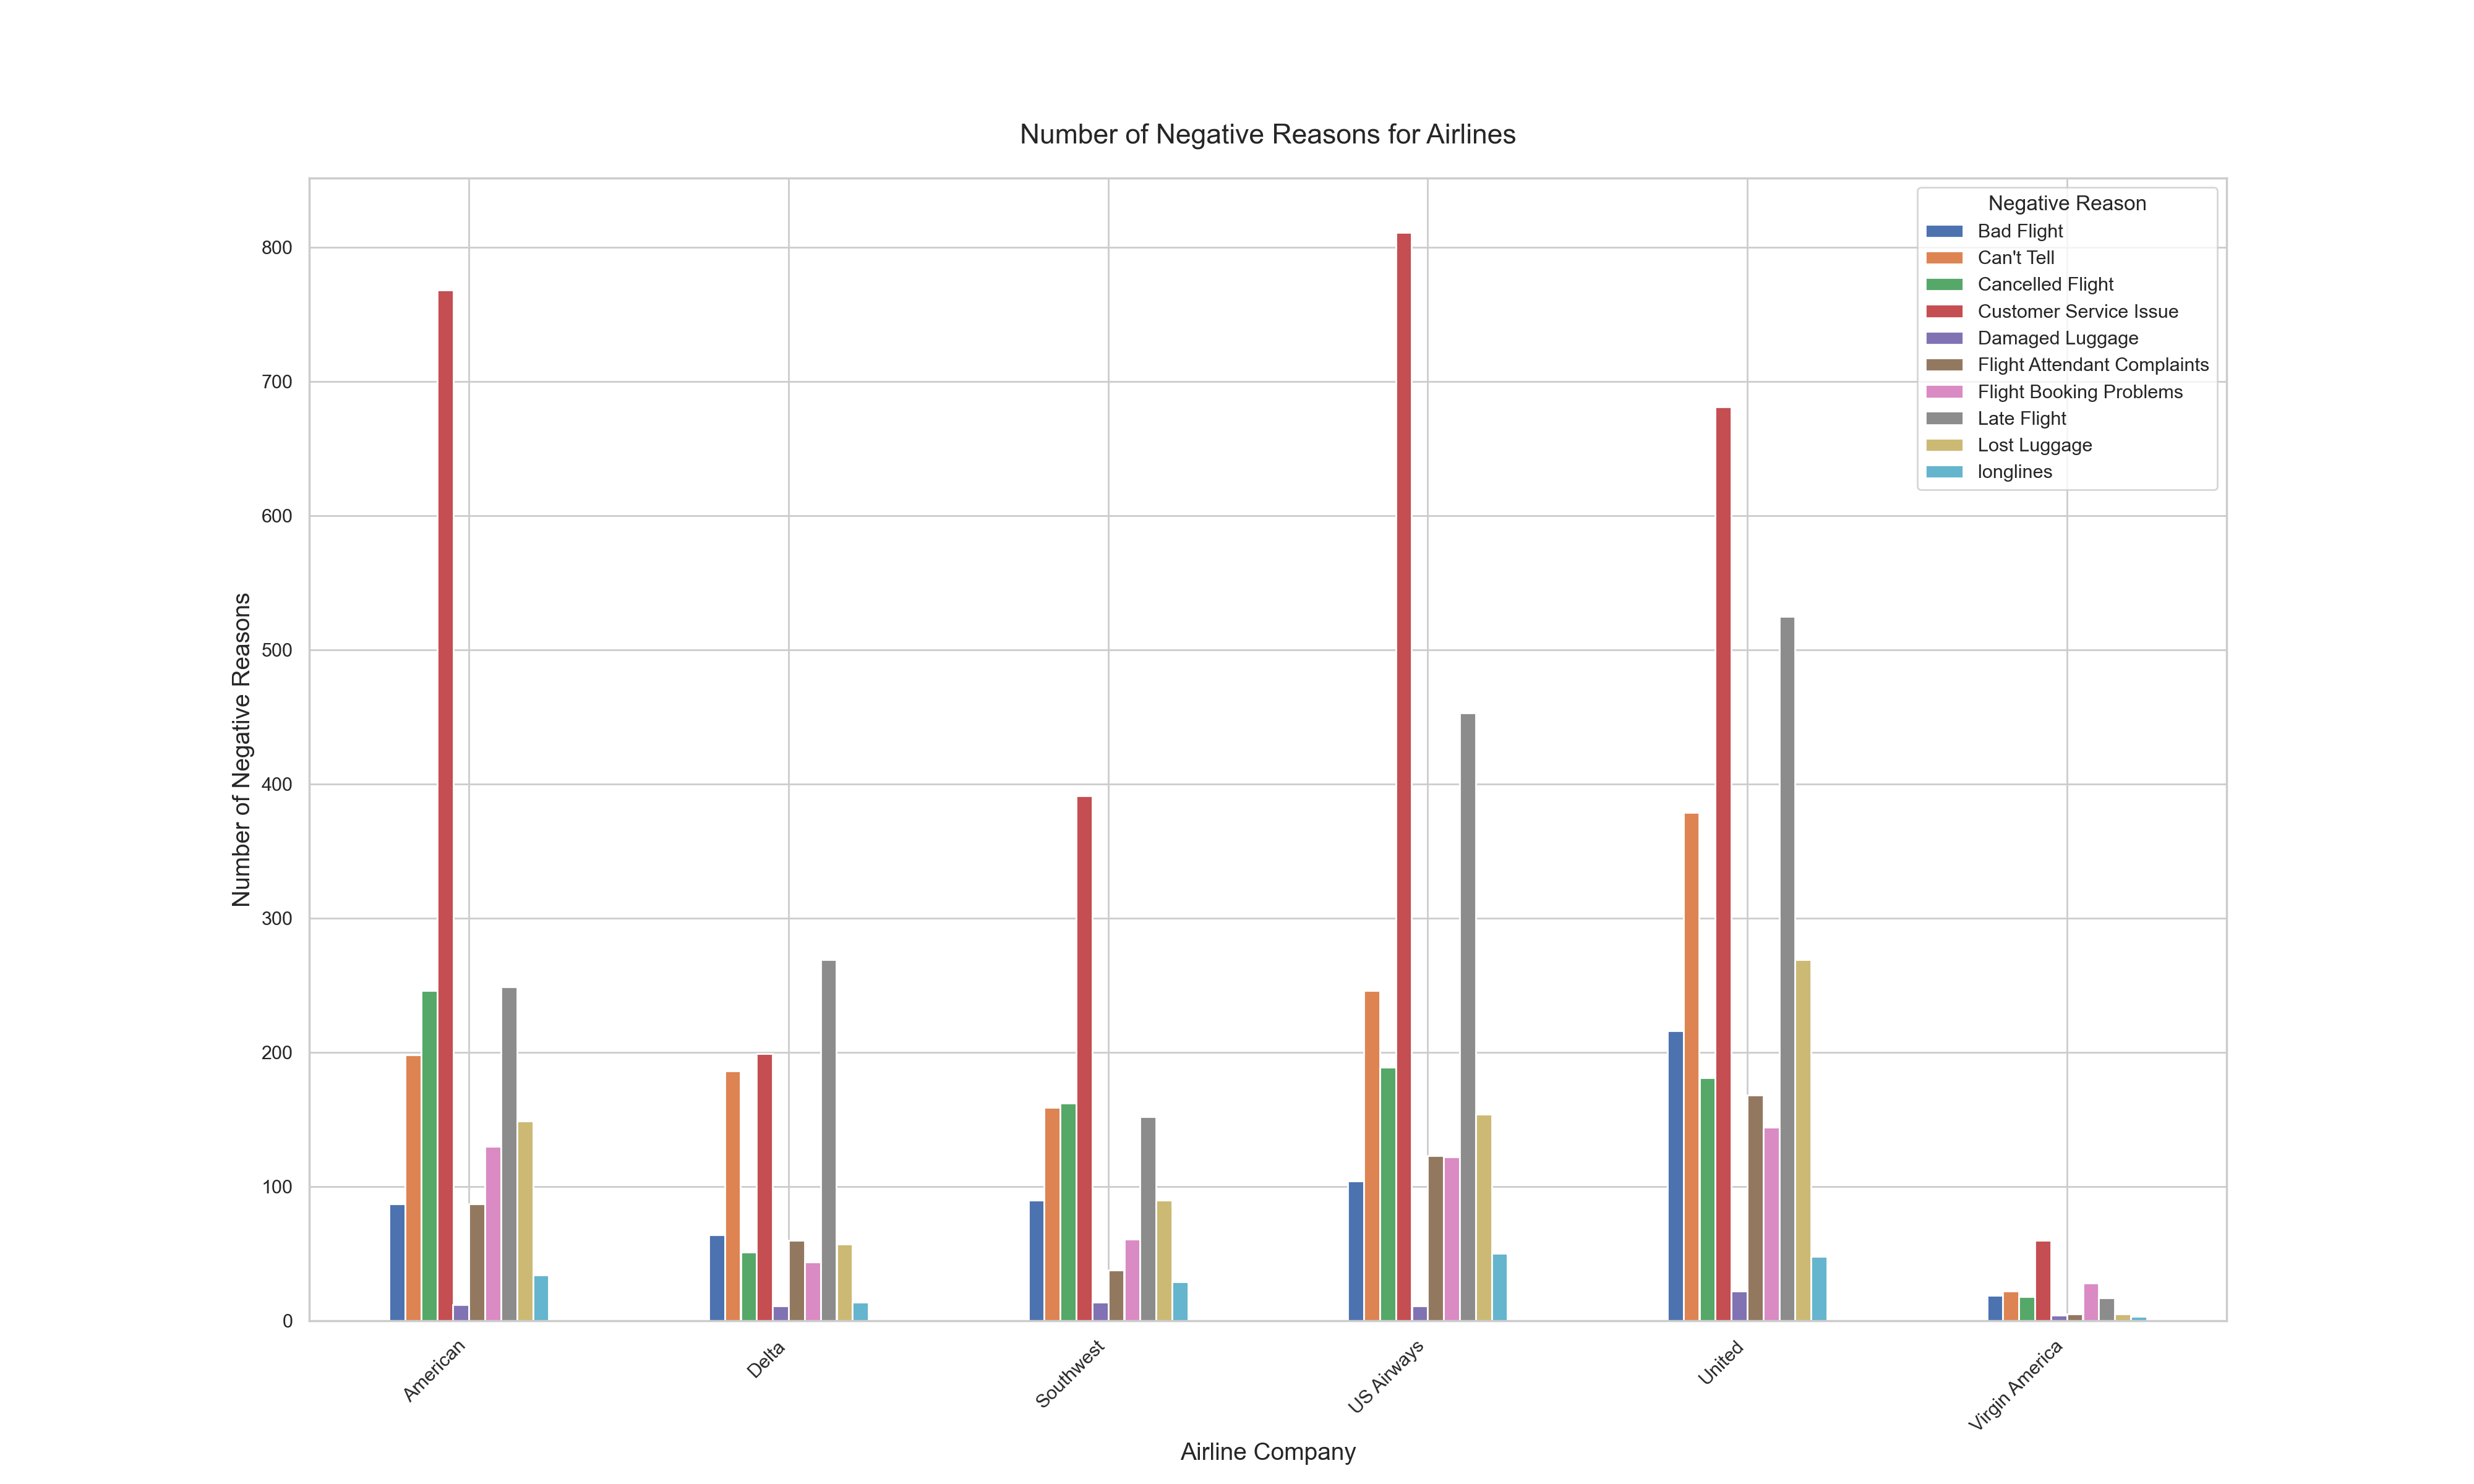

In [270]:
import seaborn as sns

sns.set(style="whitegrid")

# Count negative reasons and unstack the dataframe
negative_reasons = df_in.groupby(['airline', 'negativereason']).size().unstack(fill_value=0)

# Plot
ax = negative_reasons.plot(kind='bar', figsize=(20, 12))

plt.xlabel('Airline Company', fontsize=14)
plt.ylabel('Number of Negative Reasons', fontsize=14)
plt.title("Number of Negative Reasons for Airlines", fontsize=16, pad=20)

plt.legend(title='Negative Reason',loc='upper right')
plt.xticks(rotation=45, ha='right')

plt.show()

From the above barplot, we can see that 'Customer service issues' is among the top negative reason almost for all airlines. US Airways tops the chart with 800+ customer service issues, followed by American airlines.

Late flights are also a real cause for customer complaints. United airlines has had over 500+ late flight complaints during the timeline of the dataset followed by US Airways.

United is also hounded by a high number of lost luggage complaints, which could directly translate to financial implications in terms of vouchers/credits/lost luggage compensations.

When it comes to cancelled flights, American airlines top the chart with over 200+ cancellations during the timeline of the dataset.

These insights can help channelize the efforts to improve the issues that customer face in each of the airline, hence improving the overall customer experience.

# To understand the financials implications of the problems.

The most common places where airlines lose money are flight delays and lost luggages as they directly impact the customers. 

Cost estimates for flight delays:

What is a delay? Flights are deemed on-time if they depart within a 15-minute window of their scheduled time. 
Looking at calcualtions based on FAA data, 

the Average delay is 12.4 minutes

Cost per minute: $74,20 USD

Average number of delayed flights per month: 34.9

These costs have been increasing increasing over 9% since 2017.



Source: https://www.allthingsontimeperformance.com/flight-delays-in-numbers-not-only-painful-for-passengers/
        
https://www.faa.gov/sites/faa.gov/files/data_research/aviation_data_statistics/cost_delay_estimates.pdf

Cost estimates for lost luggages:
This data illustrates the expenses incurred by the aviation industry as a result of mishandled bags from 2007 to 2020. In 2020, the total cost attributed to bag mishandling in the aviation sector amounted to approximately 600 million U.S. dollars, marking a decrease from the previous year's figure of 2.5 billion U.S. dollars.

Source:https://www.statista.com/statistics/268276/costs-for-the-airline-industry-due-to-mishandled-bags-since-2007/#:~:text=This%20statistic%20depicts%20the%20costs,dollars%20in%20the%20previous%20year.

Other potential areas where airlines incur expenses and could also contribute to customer problems indirectly.

Operational Costs: The day-to-day operational expenses, including maintenance, crew salaries, and airport fees, can contribute to financial challenges for airlines. Slippages in maintenance could contribute to bad flights and other customer issues like delays or cancellations.

Insurance Costs: The aviation industry requires substantial insurance coverage due to the potential risks involved. Rising insurance premiums can contribute to increased operational expenses for airlines.

Aircraft Depreciation: The high initial cost of acquiring and maintaining aircraft, coupled with the depreciation of assets over time, can contribute to financial challenges for airlines. A poorly maintained aircraft can lead to inspection failures, penalties and adversely impact customer satisfaction.



# How can companies learn from eachother?

Companies can make use of sentiment analysis to understand the driving factors behind good and bad reviews.

In [293]:
##data preprocessing
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def text_cleaner(text_data):
    # Lowercasing
    cleaned_text = text_data.lower()

    # Removing Stopwords
    stop_words = set(stopwords.words('english'))
    cleaned_text = ' '.join([word for word in cleaned_text.split() if word.lower() not in stop_words])

    # Removing Punctuation
    cleaned_text = cleaned_text.translate(str.maketrans('', '', string.punctuation))

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    cleaned_text = ' '.join([lemmatizer.lemmatize(word) for word in cleaned_text.split()])

    return cleaned_text


In [300]:
df_in['cleaned_text'] = df_in['text'].apply(text_cleaner)

Southwest has the most number of positive reviews aimed at them. What makes Southwest so good?

In [307]:
df_sw_positive = df_in[(df_in['airline'] == 'Southwest') & (df_in['airline_sentiment'] == 'positive')]

In [309]:
def get_most_common_words(text_data, top_n=50):

    # Tokenize the text into words
    words = word_tokenize(text_data)

    # Calculate the frequency distribution of words
    freq_dist = FreqDist(words)

    # Get the most common words and their frequencies
    most_common_words = freq_dist.most_common(top_n)

    return most_common_words

In [311]:
text_data_sw = text_data = ' '.join(df_sw_positive['cleaned_text'].astype(str))
most_common_words_sw = get_most_common_words(text_data)
print("Most common words for SW air")
print(most_common_words_sw)

Most common words for SW air
[('southwestair', 569), ('thanks', 125), ('thank', 116), ('flight', 107), ('you', 74), ('great', 55), ('love', 47), ('u', 39), ('service', 35), ('guy', 35), ('much', 34), ('southwest', 33), ('got', 33), ('best', 32), ('time', 32), ('get', 31), ('airline', 31), ('awesome', 30), ('customer', 27), ('flying', 24), ('crew', 24), ('today', 23), ('see', 23), ('amazing', 22), ('fly', 21), ('im', 21), ('good', 20), ('go', 20), ('day', 20), ('destinationdragons', 20), ('appreciate', 20), ('help', 19), ('would', 19), ('imaginedragons', 17), ('trip', 16), ('back', 16), ('finally', 16), ('always', 15), ('thx', 15), ('sent', 15), ('swa', 15), ('last', 15), ('passbook', 15), ('make', 14), ('please', 14), ('ticket', 14), ('luv', 14), ('rock', 14), ('gate', 13), ('yall', 13)]


/Users/ushapraveen/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


<IPython.core.display.Javascript object>


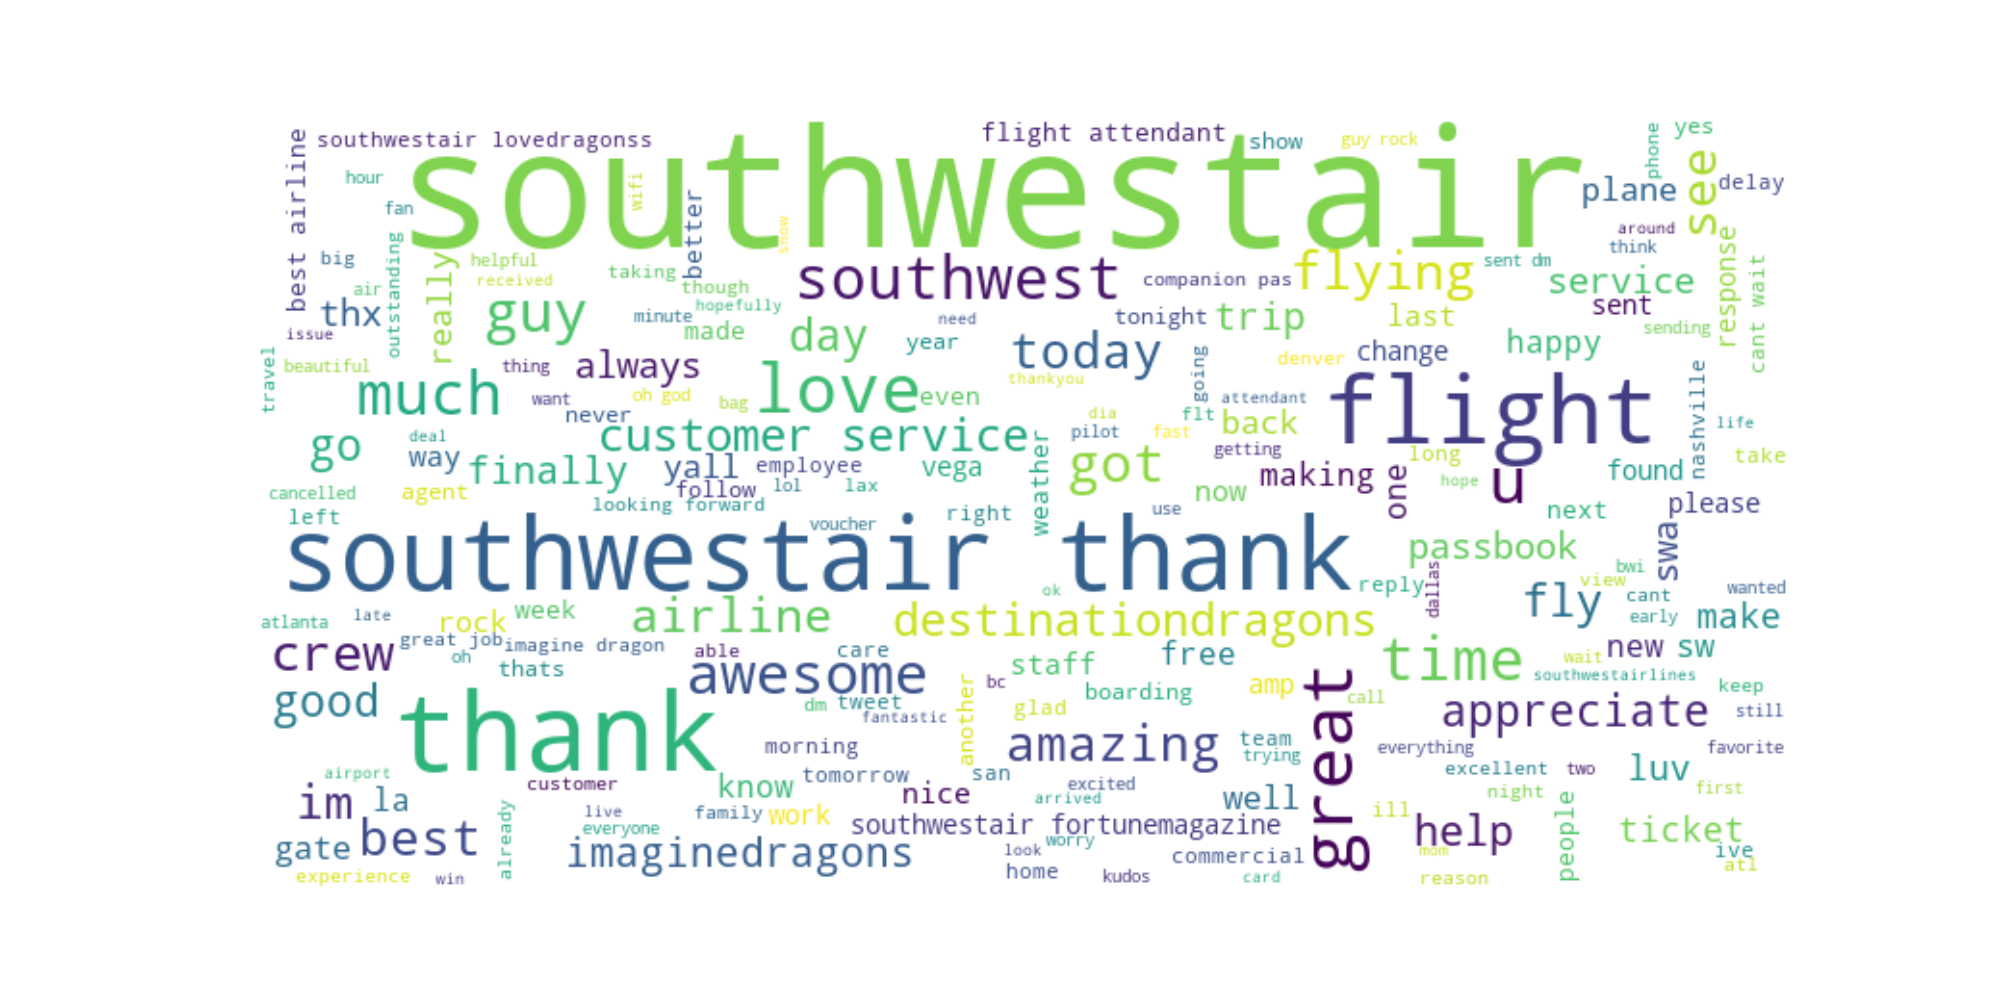

In [301]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

In [303]:
df_US_negative = df_in[(df_in['airline'] == 'US Airways') & (df_in['airline_sentiment'] == 'negative')]
df_US_negative.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,cleaned_text
8966,570310600460525568,negative,0.6292,Flight Booking Problems,0.3146,US Airways,NaN,jhazelnut,NaN,0,@USAirways is there a better time to call? My...,NaN,2015-02-24 11:53:37 -0800,NaN,NaN,usairways better time call flight friday need ...
8967,570310144459972608,negative,1.0000,Customer Service Issue,1.0000,US Airways,NaN,GAKotsch,NaN,0,@USAirways and when will one of these agents b...,NaN,2015-02-24 11:51:48 -0800,NaN,Atlantic Time (Canada),usairways one agent available speak
8970,570308799950692353,negative,1.0000,Customer Service Issue,0.6452,US Airways,NaN,retardedlarry,NaN,0,@USAirways just hung up on me again. Another ...,NaN,2015-02-24 11:46:28 -0800,NaN,NaN,usairways hung again another waste hour time s...
8972,570307605631012864,negative,1.0000,Customer Service Issue,1.0000,US Airways,NaN,Matt_Bernanke,NaN,0,@USAirways you're killing me from the inside,NaN,2015-02-24 11:41:43 -0800,NaN,Quito,usairways killing inside
8973,570307109218340865,negative,0.7020,Flight Attendant Complaints,0.7020,US Airways,NaN,jeremyleewhite,NaN,0,@USAirways is not the new @AmericanAir is more...,"[35.21979387, -80.94498281]",2015-02-24 11:39:45 -0800,NaN,NaN,usairways new americanair like new spiritairli...


/Users/ushapraveen/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


<IPython.core.display.Javascript object>


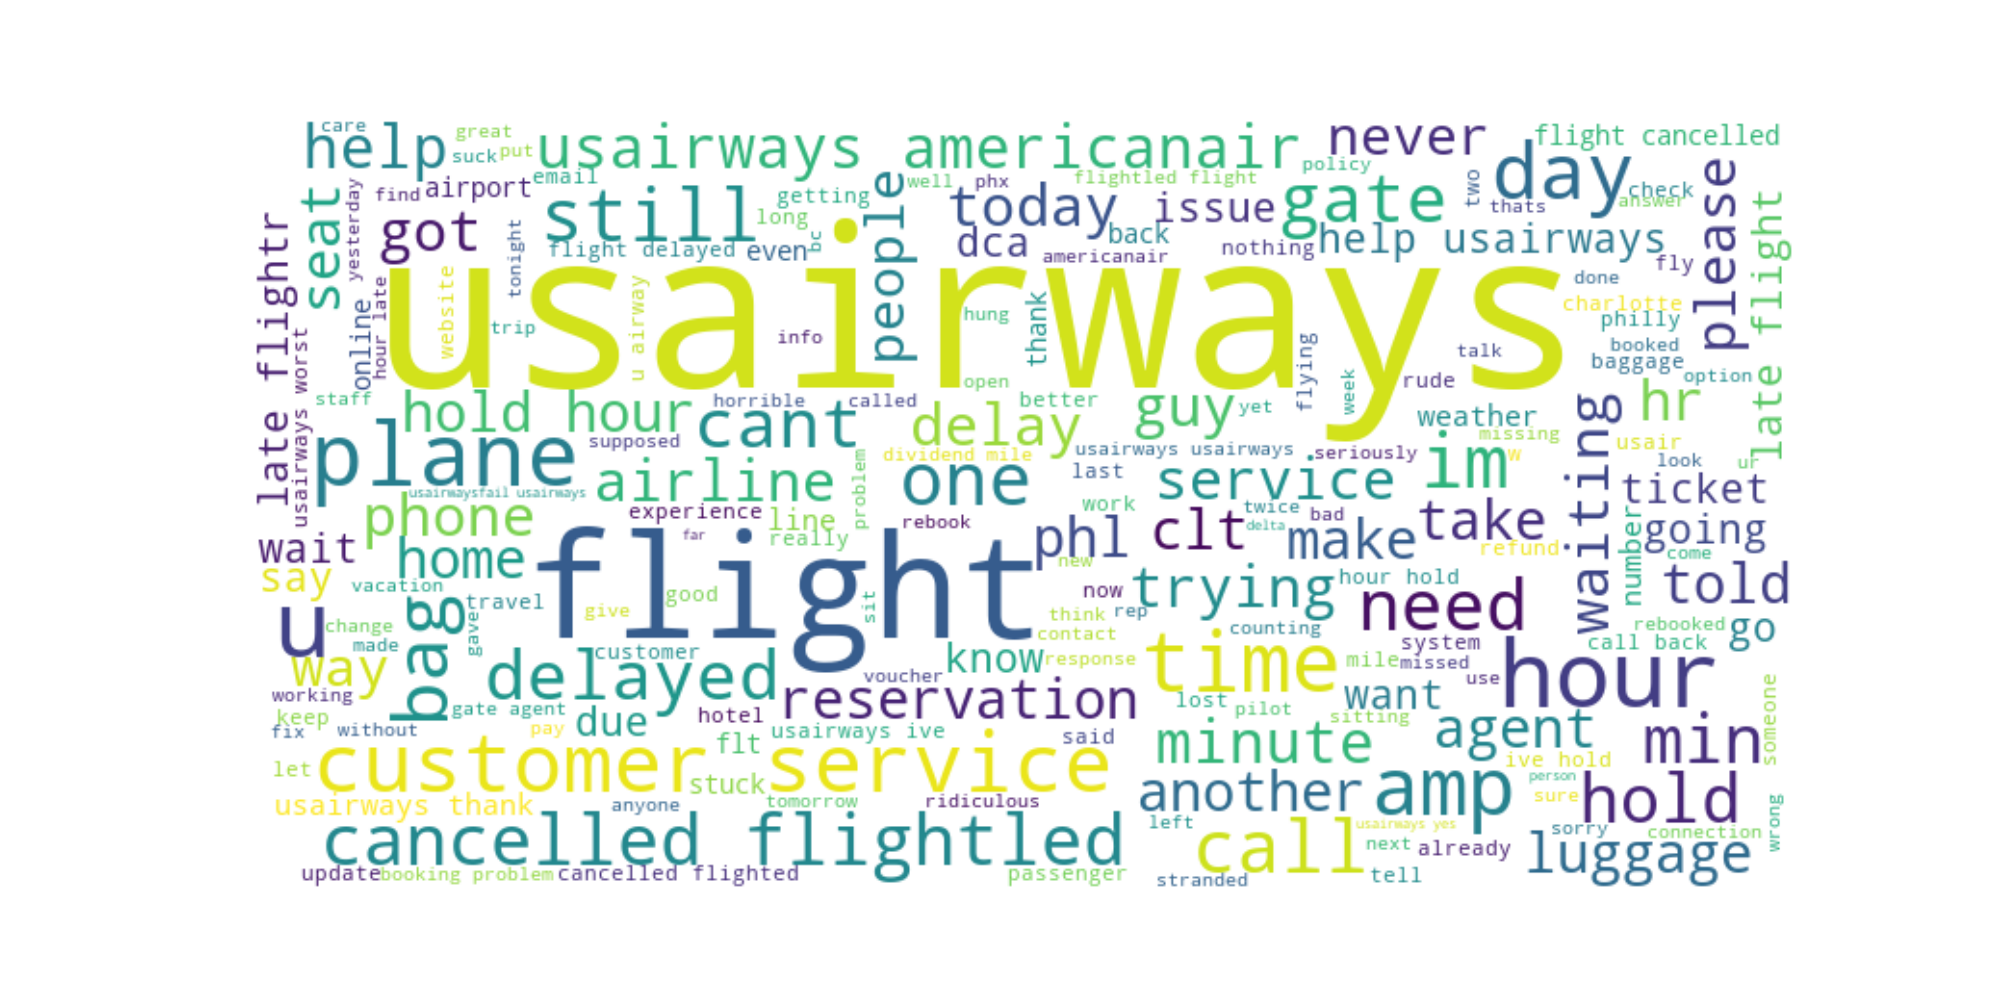

In [305]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Your text data
text_data_US = text_data = ' '.join(df_US_negative['cleaned_text'].astype(str))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

In [312]:
most_common_words_us = get_most_common_words(text_data_US)
print("Most common words for US airways")
print(most_common_words_us)

Most common words for US airways
[('usairways', 2313), ('flight', 827), ('hour', 337), ('hold', 269), ('get', 253), ('u', 248), ('service', 209), ('customer', 204), ('cancelled', 198), ('time', 181), ('help', 177), ('plane', 161), ('2', 160), ('call', 157), ('bag', 135), ('still', 131), ('amp', 127), ('phone', 125), ('day', 125), ('delayed', 125), ('need', 123), ('gate', 123), ('minute', 118), ('americanair', 117), ('im', 111), ('cant', 109), ('late', 107), ('one', 104), ('min', 102), ('flightled', 100), ('ive', 94), ('please', 93), ('waiting', 92), ('back', 91), ('delay', 89), ('airline', 89), ('trying', 88), ('3', 86), ('agent', 84), ('hr', 82), ('never', 82), ('4', 80), ('thanks', 79), ('got', 75), ('would', 75), ('today', 75), ('worst', 72), ('seat', 71), ('luggage', 71), ('guy', 70)]


When we compare the words between the airline with positive comments and the airline with negative comments, we can see stark differences. 

US airways customers are bothered by multiple delays with words like "delay","late" and "cancelled". 

Whereas, the frequent words in SW air has more appreciation from the customer for all services.

This way a further drill down on various problems can be carried out by the companies to understand what drives the customer satisfaction.